<a href="https://colab.research.google.com/github/337ubaid/AnalisisDataDicoding/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Muhammad Ubaidillah
- **Email:** devvevan@student.ub.ac.id
- **ID Dicoding:** beyubey

## Menentukan Pertanyaan Bisnis

- Kapan rental mendapatkan penyewa terbanyak ? (berdasarkan bulan, hari(0-6), jam)
- Apa pengaruh dari cuaca dan musim terhadap penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

### Gathering Data

In [198]:
logday_df = pd.read_csv('data/day.csv')
logday_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [244]:
loghour_df = pd.read_csv('data/hour.csv')
loghour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2966,2967,2011-05-08,2,0,5,12,0,0,0,1,0.60,0.6212,0.46,0.0896,139,243,382
4968,4969,2011-07-30,3,0,7,22,0,6,0,1,0.78,0.7121,0.52,0.1045,80,129,209
5255,5256,2011-08-11,3,0,8,21,0,4,1,1,0.70,0.6515,0.48,0.0896,35,171,206
416,417,2011-01-19,1,0,1,9,0,3,1,2,0.24,0.2576,0.93,0.1045,2,107,109
13940,13941,2012-08-09,3,1,8,1,0,4,1,1,0.70,0.6667,0.79,0.1343,5,23,28


### Assessing Data

#### Menilai `logday_df`

In [140]:
logday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [141]:
print(logday_df.isnull().sum())
print(logday_df.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [142]:
print("Jumlah duplikasi: ", logday_df.duplicated().sum())

Jumlah duplikasi:  0


In [143]:
logday_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai `loghour_df`

In [127]:
loghour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [128]:
print(loghour_df.isnull().sum())
print(loghour_df.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [129]:
print("Jumlah duplikasi: ",loghour_df.duplicated().sum())

Jumlah duplikasi:  0


In [130]:
loghour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Data sudah bersih karena tidak ada duplikasi data, missing value, inaccurate value, dan kesalahan tipe data. 

In [245]:
"""
Membuat dictionary untuk memudahkan membaca data
"""
seasons = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
year = {0: 2011, 1: 2012}
months = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
days = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
weather_condition = {1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'}


In [246]:
""" 
Mengubah beberapa variabel untuk memudahkan membaca
"""
logday_df.rename(columns={
    'instant': 'rec_id',
    'dteday': 'datetime',
    'yr': 'year',
    'mnth': 'month',
    'holiday': 'is_holiday',
    'workingday': 'is_workingday',
    'weathersit': 'weather_condition',
    'hum': 'humidity',
    'cnt': 'total_count',
}, inplace=True)
loghour_df.rename(columns={
    'instant': 'rec_id',
    'dteday': 'datetime',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'holiday': 'is_holiday',
    'workingday': 'is_workingday',
    'weathersit': 'weather_condition',
    'hum': 'humidity',
    'cnt': 'total_count',
}, inplace=True)


In [202]:
logday_df.head()

,rec_id,datetime,season,year,month,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [247]:
loghour_df['season'] = loghour_df['season'].map(seasons)
loghour_df['year'] = loghour_df['year'].map(year)
loghour_df['month'] = loghour_df['month'].map(months)
loghour_df['weekday'] = loghour_df['weekday'].map(days)
loghour_df['weather_condition'] = loghour_df['weather_condition'].map(weather_condition)
loghour_df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,January,3,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,January,4,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore ...

In [248]:
loghour_df.sample(5)

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
16644,16645,2012-12-01,Fall,2012,December,7,0,Saturday,0,Mist,0.24,0.2424,0.87,0.1343,7,56,63
12637,12638,2012-06-15,Spring,2012,June,18,0,Friday,1,Clear,0.72,0.6515,0.39,0.2239,121,572,693
430,431,2011-01-19,Winter,2011,January,23,0,Wednesday,1,Clear,0.30,0.2727,0.52,0.4627,1,27,28
48,49,2011-01-03,Winter,2011,January,1,0,Monday,1,Clear,0.20,0.1667,0.44,0.4179,0,2,2
720,721,2011-02-02,Winter,2011,February,9,0,Wednesday,1,Mist,0.24,0.2576,0.93,0.0896,4,119,123


In [206]:
loghour_df.groupby(by='weekday').is_workingday.value_counts().unstack()

is_workingday,0,1
weekday,,
Friday,48.0,2439.0
Monday,357.0,2122.0
Saturday,2512.0,NaN
Sunday,2502.0,NaN
Thursday,48.0,2423.0
Tuesday,23.0,2430.0
Wednesday,24.0,2451.0


In [207]:
loghour_df.groupby('weekday').agg({
    'total_count': ['min','max','sum'],
}).sort_values(by=('total_count', 'sum'), ascending=False)


total_count             
                  min  max     sum
weekday                           
Friday              1  957  487790
Thursday            1  976  485395
Saturday            1  783  477807
Wednesday           1  977  473048
Tuesday             1  970  469109
Monday              1  968  455503
Sunday              1  776  444027

In [208]:
# mengambil jam ke berapa total_count tertinggi di tiap harinya
loghour_df.groupby('weekday')['total_count'].idxmax().apply(lambda x: loghour_df.loc[x, 'hour'])

weekday
Friday       17
Monday       18
Saturday     16
Sunday       12
Thursday     17
Tuesday      17
Wednesday    18
Name: total_count, dtype: int64

tiap harinya penyewaan tertinggi antara jam 12-18

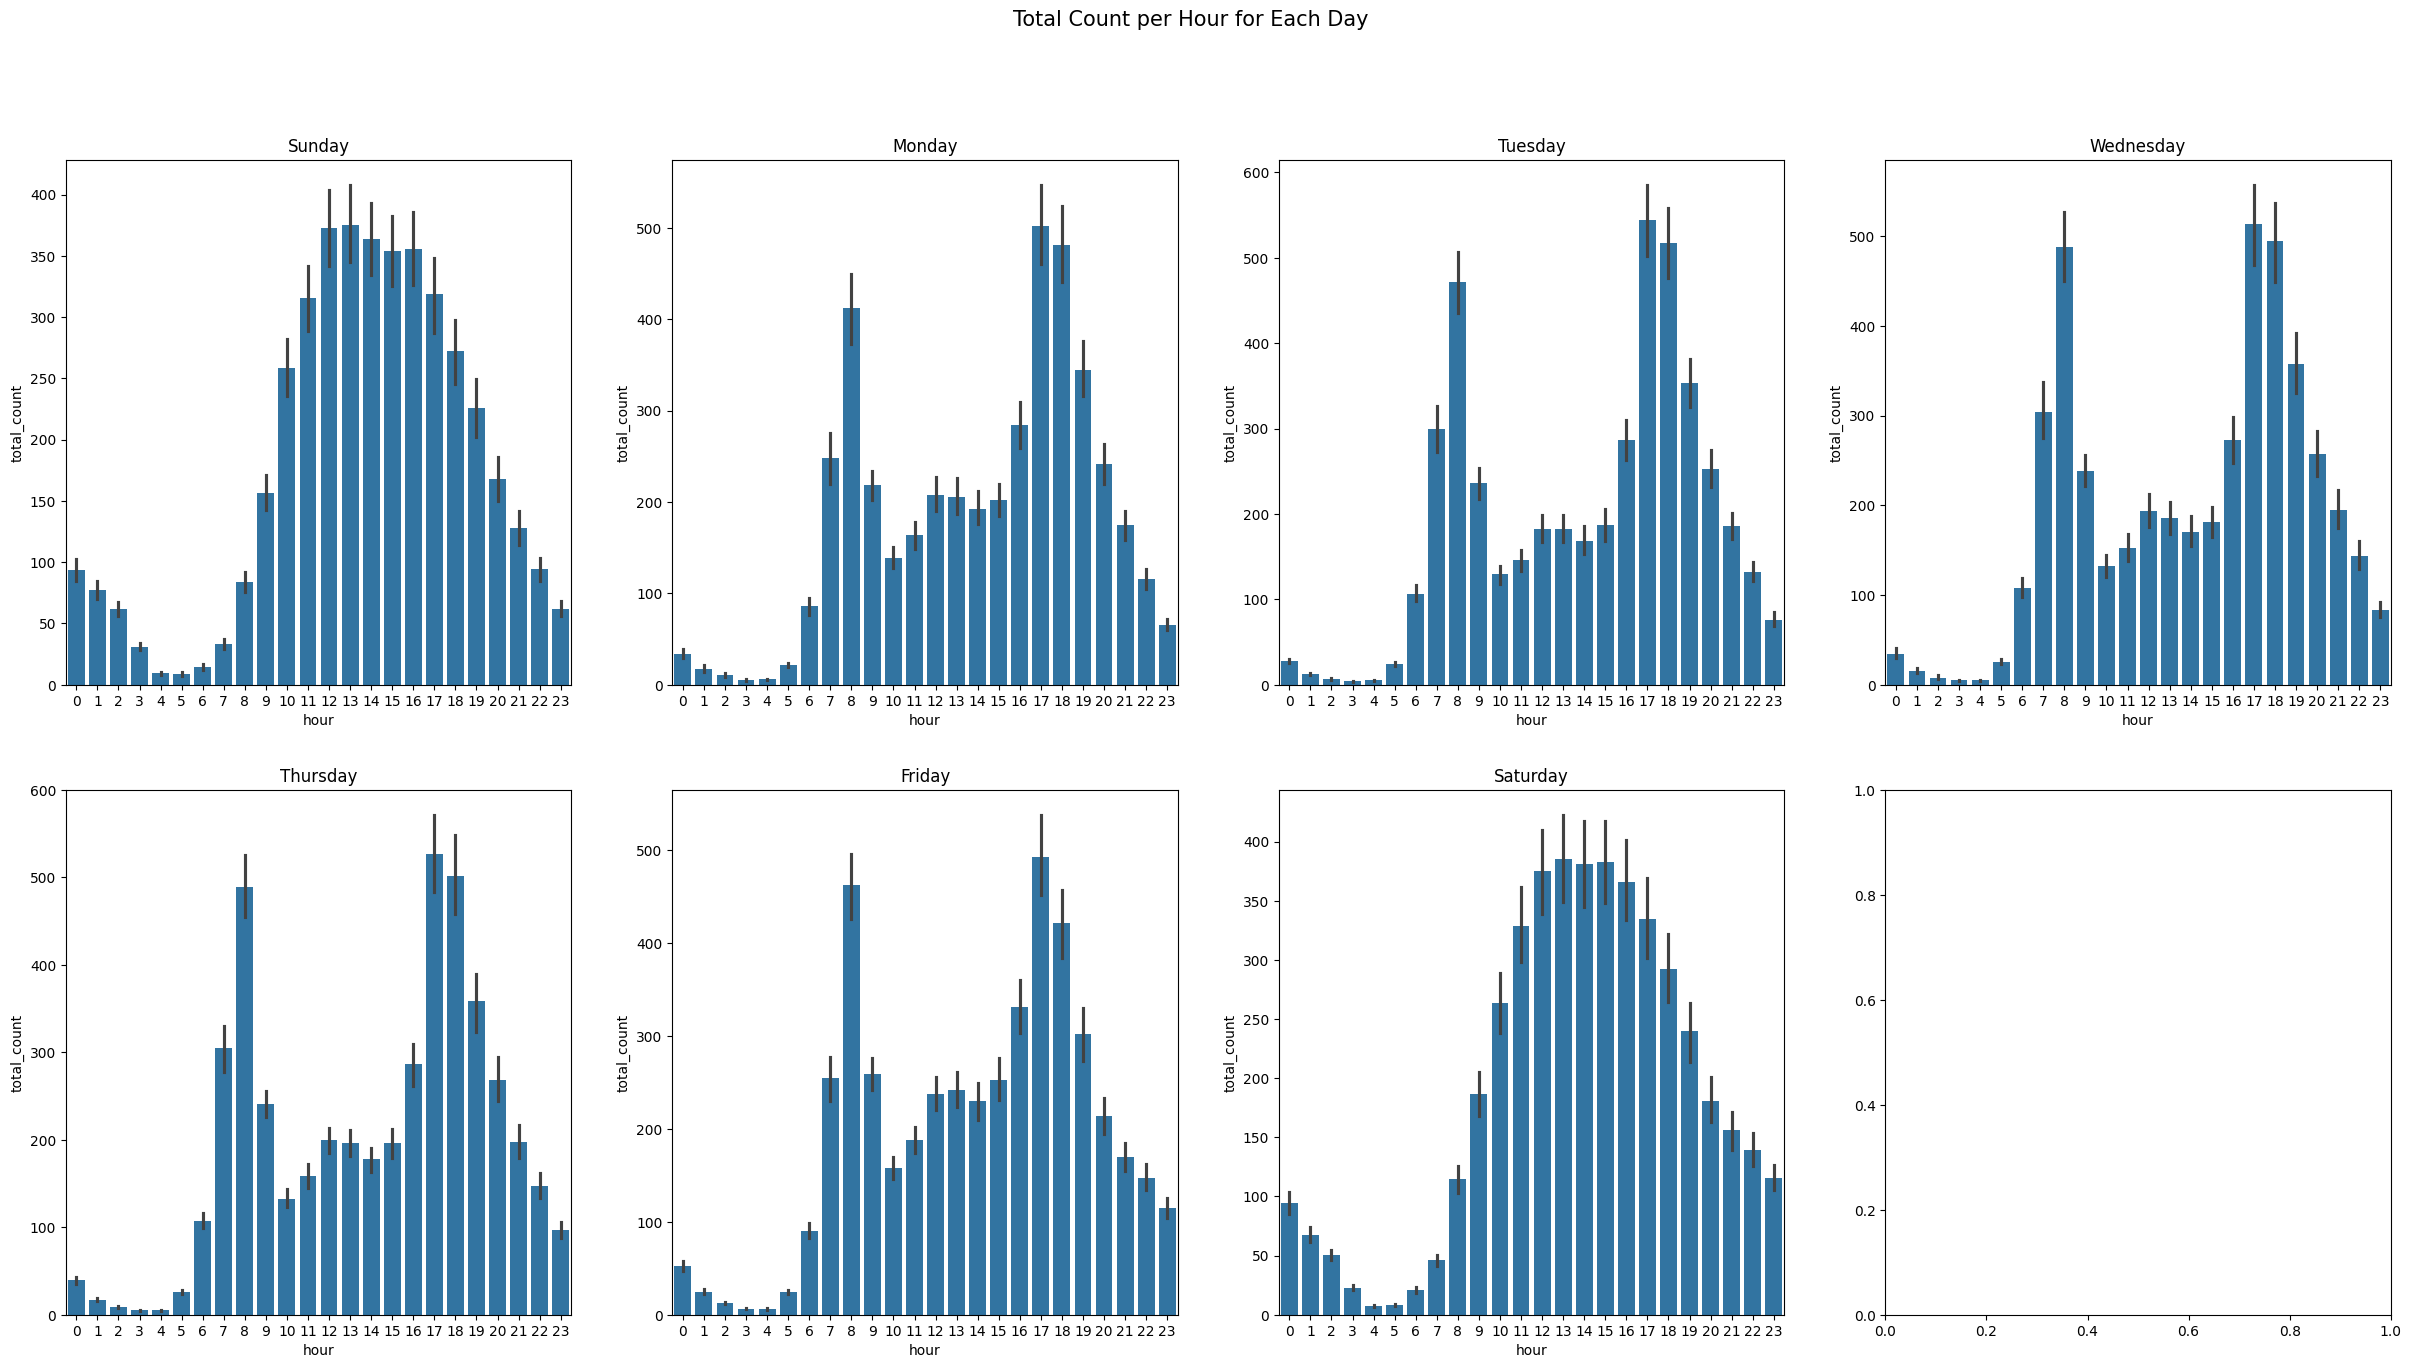

In [287]:
# Visualisasi jumlah penyewaaan per jam tiap harinya
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(30, 15))

for i, day in enumerate(days.values()):
    logday = loghour_df[loghour_df['weekday'] == day]

    sns.barplot(x="hour", y="total_count", data=logday, ax=ax[i//4][i%4])
    ax[i//4][i%4].set_title(day)

plt.suptitle('Total Count per Hour for Each Day', fontsize=15)
plt.show()

In [272]:
logday = loghour_df[loghour_df['weekday'] == 'Sunday'].sort_values(by='total_count', ascending=False).head(5)
logday

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
15031,15032,2012-09-23,Fall,2012,September,12,0,Sunday,0,Clear,0.56,0.5303,0.43,0.1045,250,526,776
14695,14696,2012-09-09,Summer,2012,September,12,0,Sunday,0,Clear,0.66,0.6212,0.47,0.0000,247,510,757
14696,14697,2012-09-09,Summer,2012,September,13,0,Sunday,0,Clear,0.68,0.6364,0.39,0.0000,238,491,729
16173,16174,2012-11-11,Fall,2012,November,15,0,Sunday,0,Clear,0.56,0.5303,0.37,0.2239,304,420,724
15036,15037,2012-09-23,Fall,2012,September,17,0,Sunday,0,Clear,0.56,0.5303,0.35,0.2985,227,496,723


In [ ]:

# sns.barplot(data=log_monday, x='hour', y='total_count')

for day in days.values():
    log_day = loghour_df[loghour_df['weekday'] == day]
    plt.figure(figsize=(10, 6))
    sns.barplot(data=log_day, x='hour', y='total_count')
    plt.title(f'Total Count by Hour - {day}')
    plt.xlabel('Hour')
    plt.ylabel('Total Count')
    plt.show()


In [211]:
loghour_df.groupby(by=['month', 'hour']).agg({
    'total_count': 'sum'
})

total_count
month     hour             
April     0            2659
          1            1612
          2            1208
          3             588
          4             289
...                     ...
September 19          24566
          20          16880
          21          12725
          22           9763
          23           6616

[288 rows x 1 columns]

In [ ]:
weather_permonth = loghour_df.groupby(['mnth-name','mnth', 'weathersit-name']).size().unstack().sort_values(by='mnth')
weather_permonth


In [ ]:

weather_permonth.plot(kind='line', figsize=(12, 6))
plt.title('based on Weather per Month', size=20)
# plt.xlabel('Month', size=15)
# plt.ylabel('Count', size=15)
plt.xticks(np.arange(0, 12), months.values(), rotation=45)
plt.legend()
plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1:

### Pertanyaan 2:

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2